In [1]:
import matplotlib.pyplot as plt

In [2]:
thread_count = [4, 8, 16]
element_count = [100000, 1000000, 100000000]

In [3]:
consistent_data = {4: [0.000393, 0.004026, 0.377076], 8: [0.000393 ,0.003940,0.379088], 16: [0.000603,0.006050, 0.581718  ]}
parallel_data = {4:[0.000471,0.006460, 0.254557], 8: [0.000599,0.007907,0.245340], 16:[0.001113,0.004181,  0.285749  ]}
parallel_data_sc = {4:[0.000538,0.006889, 0.301972], 8: [0.000699,0.007496,0.296027], 16:[0.001306,0.004222,  0.368706]}

**Визуализация времени работы программы к размерности программы:**

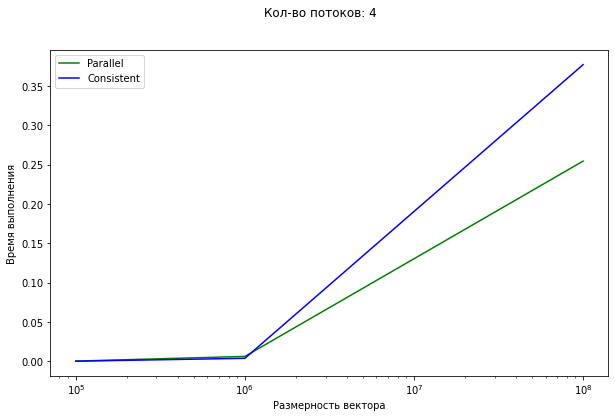

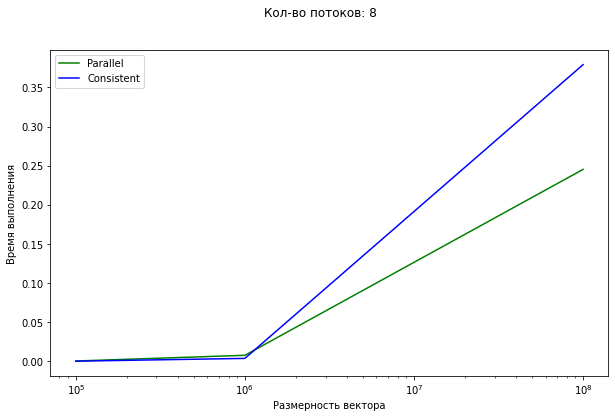

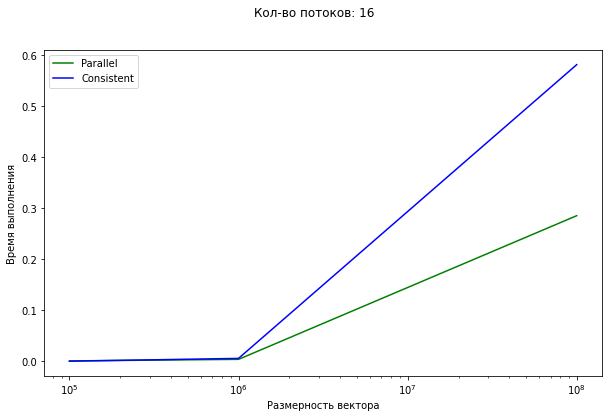

In [4]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, parallel_data[thread_count[i]], label = "Parallel", color='g')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

Для задачи поиска максимального элемента можно использовать системы с распределенной памятью. Есть заметный прирост производительности начиная с размерностей > 10^6

**Визуализация времени работы программы к кол-ву потоков:**

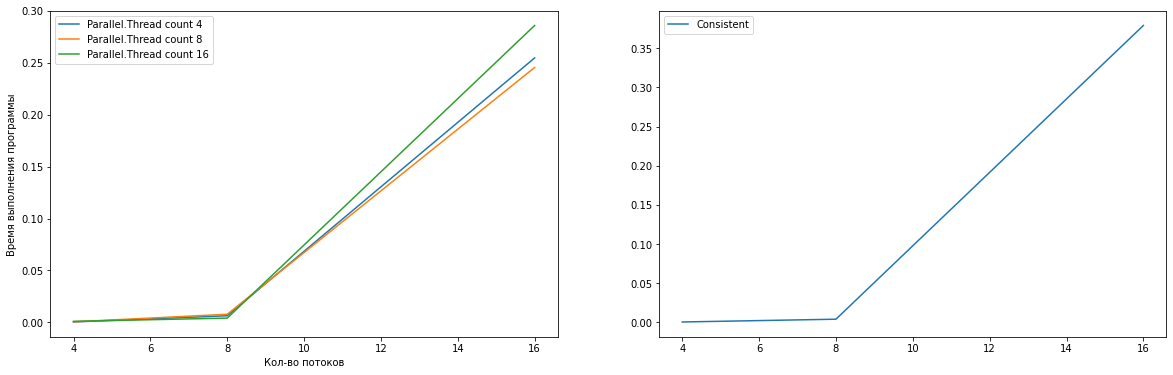

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')

ax2.plot(thread_count, consistent_data[thread_count[1]], label = 'Consistent')
for i in range(len(parallel_data)):
    ax1.plot(thread_count, parallel_data[thread_count[i]], label = 'Parallel.Thread count ' + str(thread_count[i]))
    
ax1.legend()
ax2.legend()

Бездумное увелечение числа потоков влечет к замедлению программы, потоки начинают простаивать. Видно, что для задачи поиска максимального элемента использование 8 потоков дает лучший результат, однако 16 уже худший

**Визуализация ускорения работы программы:**

In [6]:
speed_up_consistent = {k: [ b/m if m else 1 for b,m in zip(consistent_data[k], consistent_data[k])] for k in consistent_data if k in consistent_data}
speed_up_parallel = {k: [ b/m if m else 1 for b, m in zip(consistent_data[k], parallel_data[k])] for k in consistent_data if k in parallel_data}

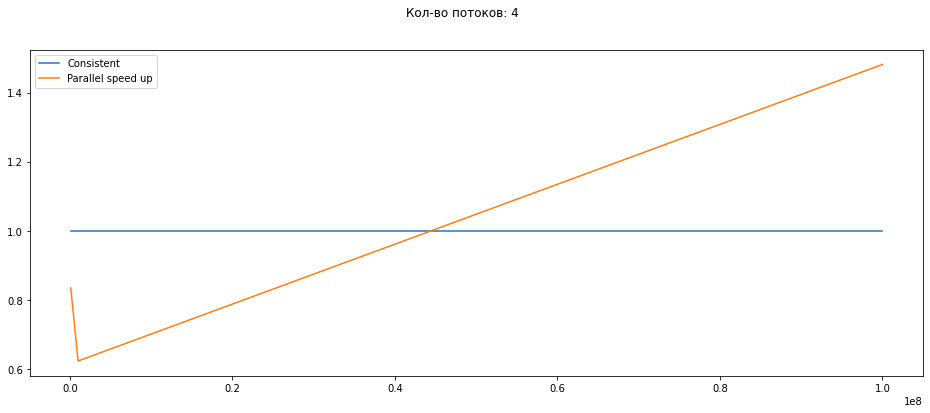

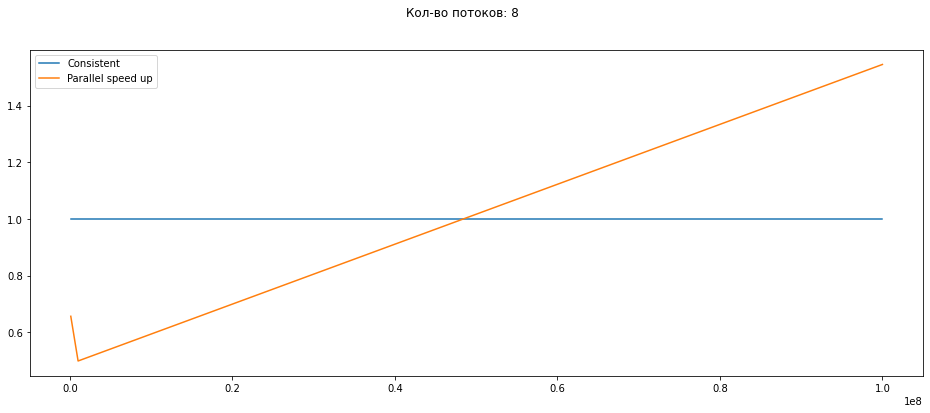

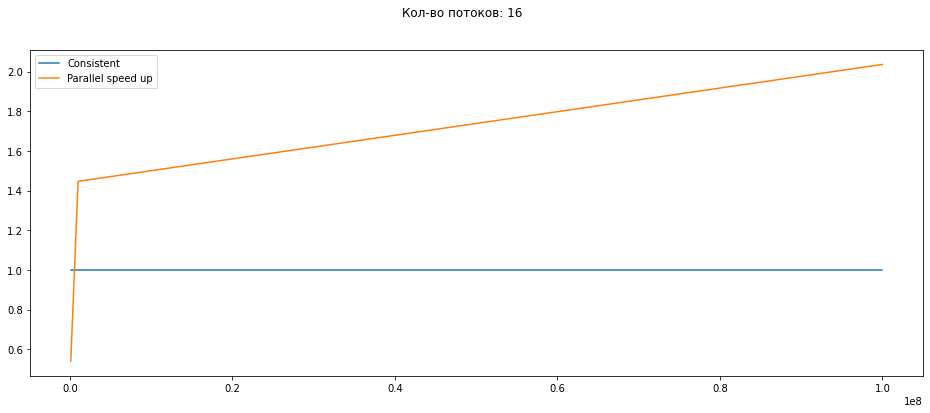

In [7]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(16, 6))
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))

    ax1.plot(element_count, speed_up_consistent[thread_count[i]], label = "Consistent")
    ax1.plot(element_count, speed_up_parallel[thread_count[i]], label = "Parallel speed up")
    ax1.legend()